In [1]:
#!pip install imblearn
# !pip install scikit-learn==0.24.0
# !pip install --upgrade imbalanced-learn
# !pip install --upgrade scikit-learn
# !pip install optuna
# !pip install tensorflow
# !pip install pydot
# !pip install graphviz
# !pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Input
from xgboost import XGBClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

2025-04-16 23:10:14.198653: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 23:10:14.634344: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 23:10:14.965641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744859415.254610  962827 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744859415.372817  962827 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744859416.145849  962827 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')


In [4]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
#we first checked only null values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
#just to make sure, in case NA is in the form of '?', '-','', 'None'
df.replace({'?': np.nan, '-': np.nan, 'None': np.nan, '':np.nan}, inplace=True)

In [7]:
df.isnull().sum() #below output shows that no other forms of missing values are present

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
#checking unique values of target variable
df['Diabetes_012'].unique()

array([0., 2., 1.])

In [9]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### From above output we observe that 75% for target variables are 0, which indicates class imbalance

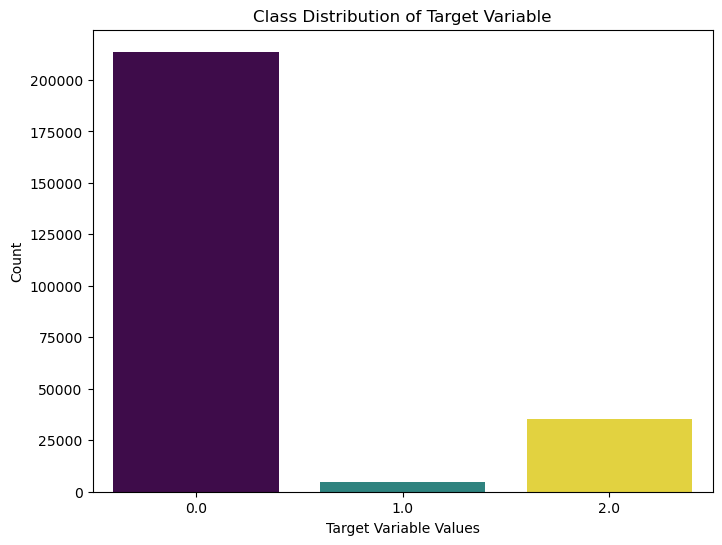

In [10]:
# Plotting the bar graph for target variable
target_counts = df['Diabetes_012'].value_counts() 
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette='viridis', legend=False)
plt.title('Class Distribution of Target Variable')
plt.xlabel('Target Variable Values')
plt.ylabel('Count')
plt.show()

In [11]:
target_counts

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [12]:
#feature and target separation
X = df.drop(columns=['Diabetes_012'])
Y=df['Diabetes_012']


In [13]:
X.shape

(253680, 21)

In [14]:
Y.shape

(253680,)

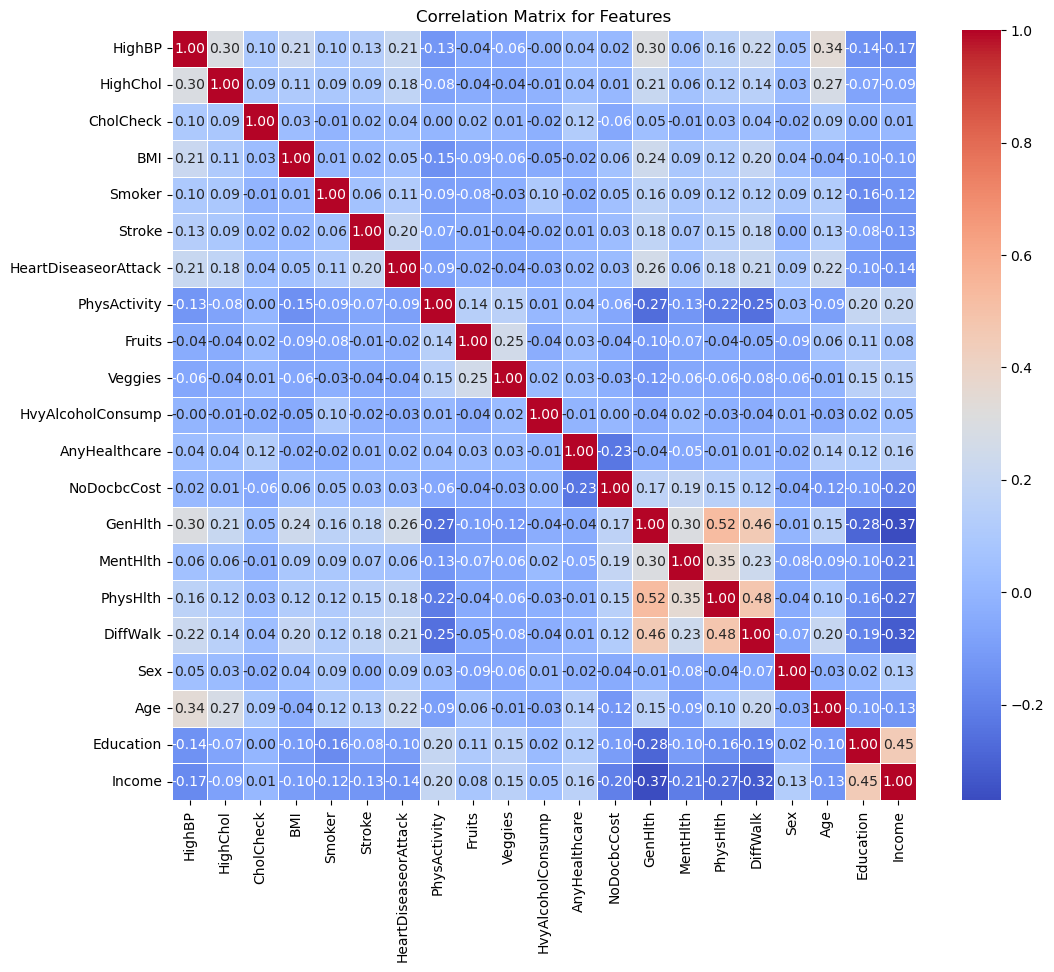

In [15]:
#mapping correlation among features
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Features')
plt.show()

In [16]:
# scatter_matrix(X, figsize=(20, 20), diagonal='hist', alpha=0.7);

In [17]:
#just to check if values are above 0.8 or not
threshold = 0.8

high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

data_reduced = X.drop(columns=high_corr_features)
print("Removed features:", high_corr_features)
print("Reduced dataset columns:", data_reduced.columns)

Removed features: set()
Reduced dataset columns: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [18]:
# Split data into training and testing sets to 60-20-20
X_trainval, X_test, y_trainval, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)

In [19]:
print('Train Data Size - ', y_train.size)
print('Validation Data Size - ', y_val.size)
print('Test Data Size - ', y_test.size)

Train Data Size -  152208
Validation Data Size -  50736
Test Data Size -  50736


In [20]:
#Standardizing the training data
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_val=scaler.transform(X_val)
X_scaled_test=scaler.transform(X_test)

In [21]:
#APPLYING PCA FOR DIMENSIONALITY REDUCTION
pca = PCA(n_components=0.9)  #we are trying to explain 90% variance of the features
X_pca_train = pca.fit_transform(X_scaled_train)
X_pca_val = pca.transform(X_scaled_val)
X_pca_test = pca.transform(X_scaled_test)

In [22]:
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.16732429 0.08414492 0.0647998  0.05688935 0.05518664 0.05166351
 0.04924226 0.04502005 0.04387052 0.04183255 0.03866768 0.0377223
 0.03545414 0.03494648 0.0339297  0.0334428  0.03156397]


In [23]:
pca.n_components_   #no. of reduced features

np.int64(17)

In [24]:
X_pca_train.shape

(152208, 17)

In [25]:
y_train.shape

(152208,)

In [26]:
np.unique(y_test, return_counts=True)

(array([0., 1., 2.]), array([42741,   926,  7069]))

## Applying SMOTE for Handling Class Imbalance

In [27]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_pca_train, y_train)
print("Original class distribution:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_train_smote).value_counts())

Original class distribution:
 Diabetes_012
0.0    128221
2.0     21208
1.0      2779
Name: count, dtype: int64

After SMOTE:
 Diabetes_012
0.0    128221
2.0    128221
1.0    128221
Name: count, dtype: int64


## Finally, time to play with algorithms

### We made use of Bayesian Optimization instead of gridsearch CV for selecting parameters

In [28]:
 def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf',3, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42
    }

    clf = RandomForestClassifier(**params)
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_pca_val)
    return f1_score(y_val, y_pred, average='micro')

In [29]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

[I 2025-04-14 13:25:51,251] A new study created in memory with name: no-name-52e52dec-ee30-41ac-9fbe-c4b322271be3
[I 2025-04-14 13:39:30,346] Trial 0 finished with value: 0.6213733837906024 and parameters: {'n_estimators': 97, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 0 with value: 0.6213733837906024.
[I 2025-04-14 13:43:48,549] Trial 1 finished with value: 0.6370230211289813 and parameters: {'n_estimators': 125, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.6370230211289813.
[I 2025-04-14 13:46:58,133] Trial 2 finished with value: 0.5943905707978555 and parameters: {'n_estimators': 178, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: 0.6370230211289813.
[I 2025-04-14 13:49:49,617] Trial 3 finished with value: 0.6210383159886471 and parameters: {'n_estimators': 96, 'max_depth': 9, 'min_

In [30]:
print("Best trial:")
print(study.best_trial)

Best trial:
FrozenTrial(number=1, state=TrialState.COMPLETE, values=[0.6370230211289813], datetime_start=datetime.datetime(2025, 4, 14, 13, 39, 30, 348569), datetime_complete=datetime.datetime(2025, 4, 14, 13, 43, 48, 548803), params={'n_estimators': 125, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=50, step=1), 'max_depth': IntDistribution(high=15, log=False, low=5, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=5, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=3, step=1), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2', None))}, trial_id=1, value=None)


In [31]:
# Train best model on train set
best_params = study.best_trial.params
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=11, max_features='log2', min_samples_leaf=3,
                       min_samples_split=6, n_estimators=125)

In [32]:
# Evaluate on val
print("\n--- Validation Metrics ---")
y_val_pred = best_rf.predict(X_pca_val)
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


--- Validation Metrics ---
[[27605  6031  9105]
 [  262   215   449]
 [ 1227  1353  4489]]
              precision    recall  f1-score   support

         0.0       0.95      0.65      0.77     42741
         1.0       0.03      0.23      0.05       926
         2.0       0.32      0.64      0.43      7069

    accuracy                           0.64     50736
   macro avg       0.43      0.50      0.41     50736
weighted avg       0.84      0.64      0.71     50736



In [33]:
# Evaluate on test
print("\n--- Test Metrics ---")
y_test_pred = best_rf.predict(X_pca_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


--- Test Metrics ---
[[27786  5999  8956]
 [  254   231   441]
 [ 1213  1325  4531]]
              precision    recall  f1-score   support

         0.0       0.95      0.65      0.77     42741
         1.0       0.03      0.25      0.05       926
         2.0       0.33      0.64      0.43      7069

    accuracy                           0.64     50736
   macro avg       0.44      0.51      0.42     50736
weighted avg       0.85      0.64      0.71     50736



### Applying XGBOOST on SMOTE DATA

In [34]:
xgb_model = XGBClassifier(
    objective='multi:softmax', 
    num_class=3,               
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train_smote, y_train_smote)

/home/campus24/rbagaria/.conda/envs/cs5831/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:56:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

In [35]:
print("\n--- Validation Metrics ---")
y_val_pred = xgb_model.predict(X_pca_val)
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


--- Validation Metrics ---
[[28121  6271  8349]
 [  285   210   431]
 [ 1362  1511  4196]]
              precision    recall  f1-score   support

         0.0       0.94      0.66      0.78     42741
         1.0       0.03      0.23      0.05       926
         2.0       0.32      0.59      0.42      7069

    accuracy                           0.64     50736
   macro avg       0.43      0.49      0.41     50736
weighted avg       0.84      0.64      0.71     50736



In [36]:
print("\n--- Test Metrics ---")
y_test_pred = xgb_model.predict(X_pca_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


--- Test Metrics ---
[[28247  6168  8326]
 [  285   222   419]
 [ 1407  1470  4192]]
              precision    recall  f1-score   support

         0.0       0.94      0.66      0.78     42741
         1.0       0.03      0.24      0.05       926
         2.0       0.32      0.59      0.42      7069

    accuracy                           0.64     50736
   macro avg       0.43      0.50      0.42     50736
weighted avg       0.84      0.64      0.71     50736



## Neural Network Approach

### The following approach works directly on imbalanced dataset

In [37]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
trained_model=model.fit(X_trainval, y_trainval, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20


2025-04-14 13:56:25.480949: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


4757/4757 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7824 - loss: 0.6069 - val_accuracy: 0.8446 - val_loss: 0.4135
Epoch 2/20
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8436 - loss: 0.4122 - val_accuracy: 0.8474 - val_loss: 0.4037
Epoch 3/20
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8454 - loss: 0.4099 - val_accuracy: 0.8492 - val_loss: 0.3993
Epoch 4/20
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8449 - loss: 0.4073 - val_accuracy: 0.8501 - val_loss: 0.3961
Epoch 5/20
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8467 - loss: 0.4019 - val_accuracy: 0.8437 - val_loss: 0.4076
Epoch 6/20
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8476 - loss: 0.4004 - val_accuracy: 0.8501 - val_loss: 0.3941
Epoch 7/20
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8473 - loss: 0.3999 - val_accuracy: 0.8501 - val_loss: 0.3945
Epoch 8/20
4757/4757 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8477 - loss: 0.3978 - val_accurac

In [38]:
nn_predictions = model.predict(X_test)
nn_pred_classes = np.argmax(nn_predictions, axis=1)


1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step 


In [39]:
nn_accuracy = accuracy_score(y_test, nn_pred_classes)
print("Test Accuracy:", nn_accuracy)

Test Accuracy: 0.847051403342794


In [40]:
confusion_matrix(y_test, nn_pred_classes)

array([[41588,     0,  1153],
       [  825,     0,   101],
       [ 5681,     0,  1388]])

In [41]:
print(classification_report(y_test, nn_pred_classes))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.53      0.20      0.29      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



/home/campus24/rbagaria/.conda/envs/cs5831/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/campus24/rbagaria/.conda/envs/cs5831/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/campus24/rbagaria/.conda/envs/cs5831/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [42]:
#we realized that the class 1 is not predicted good.

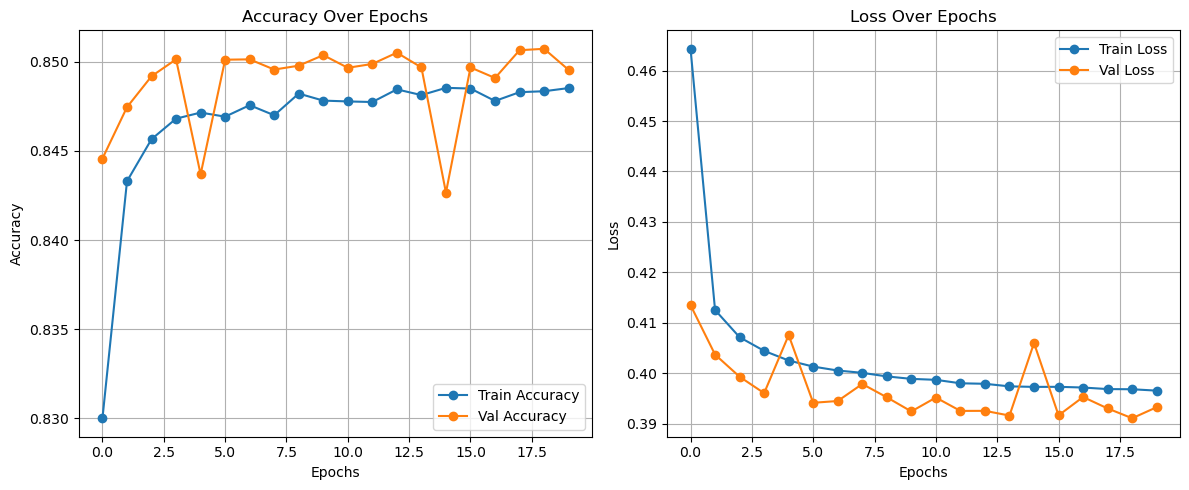

In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(trained_model.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'], label='Train Loss', marker='o')
plt.plot(trained_model.history['val_loss'], label='Val Loss', marker='o')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [44]:
# While training time for RF was around 20 minutes, Neural Network was done in 2 minutes and with better results

### Applying SMOTE directly on Training data and checking Neural Network Performance

In [45]:
smote = SMOTE(random_state=42)
X_train_nn_smote, y_train_nn_smote = smote.fit_resample(X_train, y_train)
print("Original class distribution:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_train_nn_smote).value_counts())

Original class distribution:
 Diabetes_012
0.0    128221
2.0     21208
1.0      2779
Name: count, dtype: int64

After SMOTE:
 Diabetes_012
0.0    128221
2.0    128221
1.0    128221
Name: count, dtype: int64


In [46]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
trained_model=model.fit(X_train_nn_smote, y_train_nn_smote, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.5719 - loss: 0.9299 - val_accuracy: 7.4871e-04 - val_loss: 2.0290
Epoch 2/20
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6181 - loss: 0.8306 - val_accuracy: 0.0015 - val_loss: 1.9089
Epoch 3/20
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6215 - loss: 0.8247 - val_accuracy: 7.6950e-04 - val_loss: 2.1146
Epoch 4/20
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6279 - loss: 0.8183 - val_accuracy: 0.0407 - val_loss: 1.6751
Epoch 5/20
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6345 - loss: 0.8102 - val_accuracy: 0.0201 - val_loss: 1.7415
Epoch 6/20
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6420 - loss: 0.8007 - val_accuracy: 0.0301 - val_loss: 1.8093
Epoch 7/20
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6695 - loss: 0.7574 - val_accuracy: 0.0165 - val_loss: 1.9957
Epoch 8/20
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6972 -

In [47]:
smote_predictions = model.predict(X_test)
smote_pred_classes = np.argmax(smote_predictions, axis=1)
print(classification_report(y_test, smote_pred_classes))

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step 
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85     42741
         1.0       0.03      0.40      0.06       926
         2.0       0.56      0.06      0.11      7069

    accuracy                           0.70     50736
   macro avg       0.50      0.42      0.34     50736
weighted avg       0.83      0.70      0.73     50736



### Applying ADASYN directly on Training data and checking Neural Network Performance

In [48]:
adasyn = ADASYN(random_state=42)
X_train_nn_adasyn, y_train_nn_adasyn = adasyn.fit_resample(X_train, y_train)

# Print class distribution
print("Original class distribution:\n", y_train.value_counts())
print("\nAfter ADASYN:\n", pd.Series(y_train_nn_adasyn).value_counts())

Original class distribution:
 Diabetes_012
0.0    128221
2.0     21208
1.0      2779
Name: count, dtype: int64

After ADASYN:
 Diabetes_012
1.0    128802
2.0    128657
0.0    128221
Name: count, dtype: int64


In [49]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
trained_model=model.fit(X_train_nn_adasyn, y_train_nn_adasyn, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
9040/9040 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.5801 - loss: 0.8866 - val_accuracy: 0.0000e+00 - val_loss: 1.9853
Epoch 2/20
9040/9040 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6184 - loss: 0.8347 - val_accuracy: 0.0000e+00 - val_loss: 1.9728
Epoch 3/20
9040/9040 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6301 - loss: 0.8190 - val_accuracy: 0.0000e+00 - val_loss: 2.0966
Epoch 4/20
9040/9040 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6484 - loss: 0.7947 - val_accuracy: 0.0000e+00 - val_loss: 2.1222
Epoch 5/20
9040/9040 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6631 - loss: 0.7659 - val_accuracy: 0.0000e+00 - val_loss: 2.0998
Epoch 6/20
9040/9040 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6723 - loss: 0.7458 - val_accuracy: 0.0000e+00 - val_loss: 2.0672
Epoch 7/20
9040/9040 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6876 - loss: 0.7228 - val_accuracy: 0.0000e+00 - val_loss: 2.0907
Epoch 8/20
9040/9040 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step 

In [50]:
adasyn_predictions = model.predict(X_test)


1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step 


In [51]:
adasyn_pred_classes = np.argmax(adasyn_predictions, axis=1)

print(classification_report(y_test, adasyn_pred_classes))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87     42741
         1.0       0.04      0.35      0.06       926
         2.0       0.44      0.06      0.11      7069

    accuracy                           0.73     50736
   macro avg       0.46      0.42      0.35     50736
weighted avg       0.81      0.73      0.75     50736

